In [2]:
#1. import libraries
#2. Check for initial infos
#3. Plot some graphics
#4. Use ml to predict data

#1. import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sb

In [11]:
#2. Check for initial infos
dataset = pd.read_csv("sales.csv",sep=',')
dataset.head() #1st rows

,date,id,category_id,sales,views,price_cost,price_retail
0,2022-02-24,1,3,0,0,0,0
1,2022-02-25,1,3,0,0,0,0
2,2022-02-26,1,3,0,0,0,0
3,2022-02-27,1,3,0,0,0,0
4,2022-02-28,1,3,0,0,0,0


In [4]:
dataset.describe().transpose() #info

,count,mean,std,min,25%,50%,75%,max
id,2548824.0,1741.500000,1005.166974,1.0,871.0,1741.5,2612.0,3482.0
category_id,2548824.0,1.590752,0.650591,1.0,1.0,2.0,2.0,4.0
sales,2548824.0,0.370607,5.039799,0.0,0.0,0.0,0.0,1372.0
views,2548824.0,38.251298,182.429863,0.0,0.0,8.0,33.0,43148.0
price_cost,2548824.0,12193.176433,18581.602576,0.0,0.0,3546.0,18148.0,292573.0
price_retail,2548824.0,17686.157254,26413.873221,0.0,0.0,7582.0,25800.0,759077.0


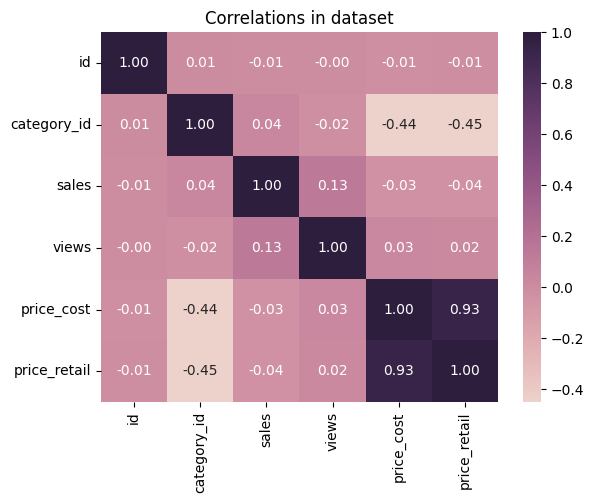

In [4]:
#3. Plot some graphics
#heat map - find correlations between variables

dataset_without_data = dataset.drop("date",axis=1)

plt.figure()
sb.heatmap(dataset_without_data.corr(),annot=True,cmap=sb.cubehelix_palette(as_cmap=True), fmt='.2f').set_title('Correlations in dataset')
plt.show()


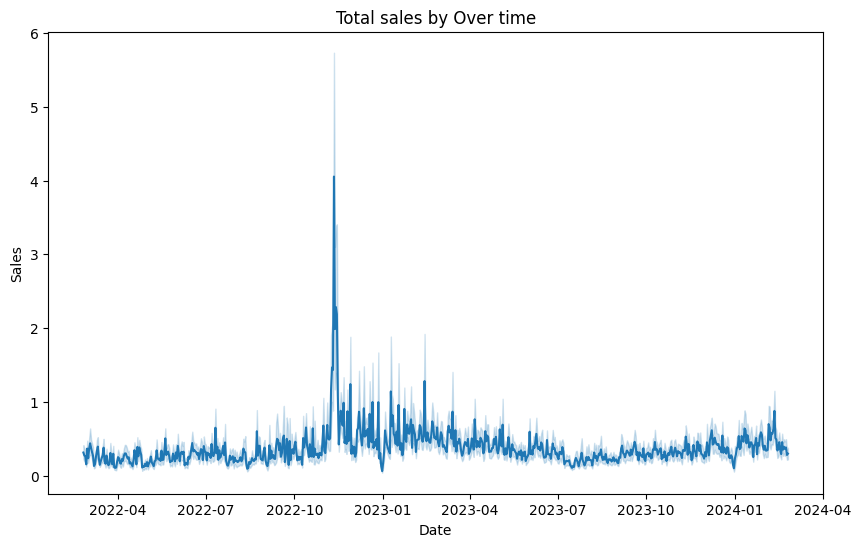

In [5]:
#transform date to datetime
dataset['date'] = pd.to_datetime(dataset['date'])

#sales over time
plt.figure(figsize=(10,6))
sb.lineplot(x='date',y='sales',data = dataset)
plt.title("Total sales by Over time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

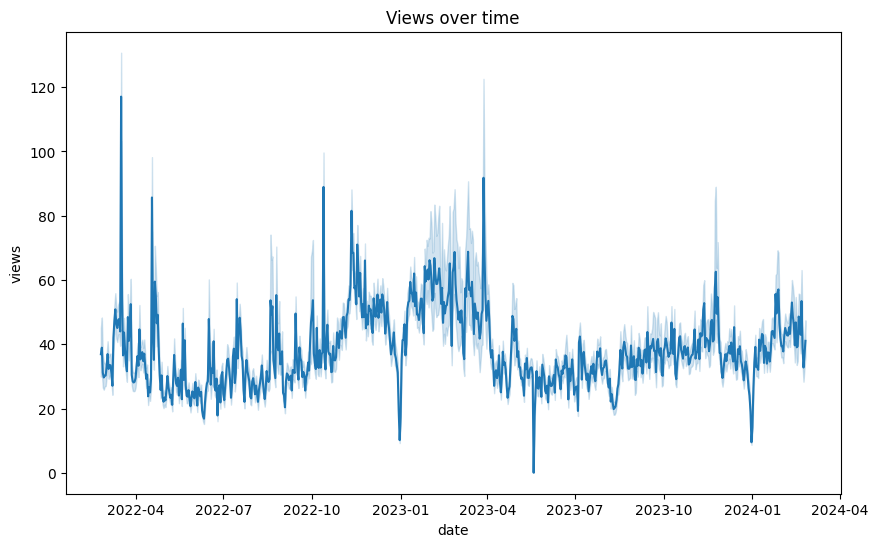

In [6]:
#views over time
plt.figure(figsize=(10,6))
sb.lineplot(x='date',y='views',data=dataset)
plt.xlabel("date")
plt.ylabel("views")
plt.title("Views over time")
plt.show()

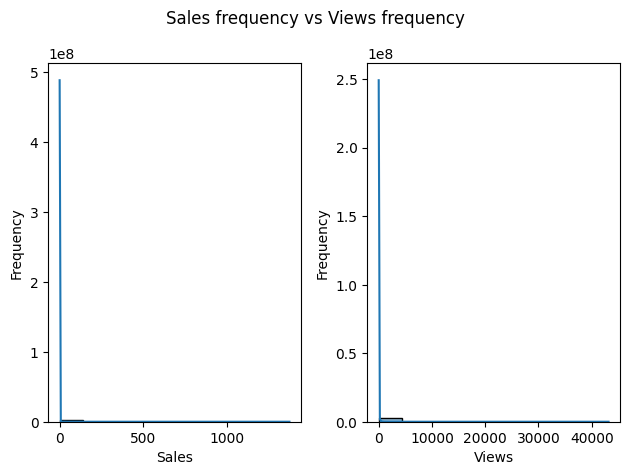

In [7]:
#frequency of sales vs frequency of views

#frequency of sales
plt.figure().suptitle('Sales frequency vs Views frequency')
plt.subplot(1,2,1)
sb.histplot(dataset['sales'],bins=10,kde=True)
plt.xlabel('Sales')
plt.ylabel('Frequency')
#frequency of views
plt.subplot(1,2,2)
sb.histplot(dataset['views'],bins=10,kde=True)
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


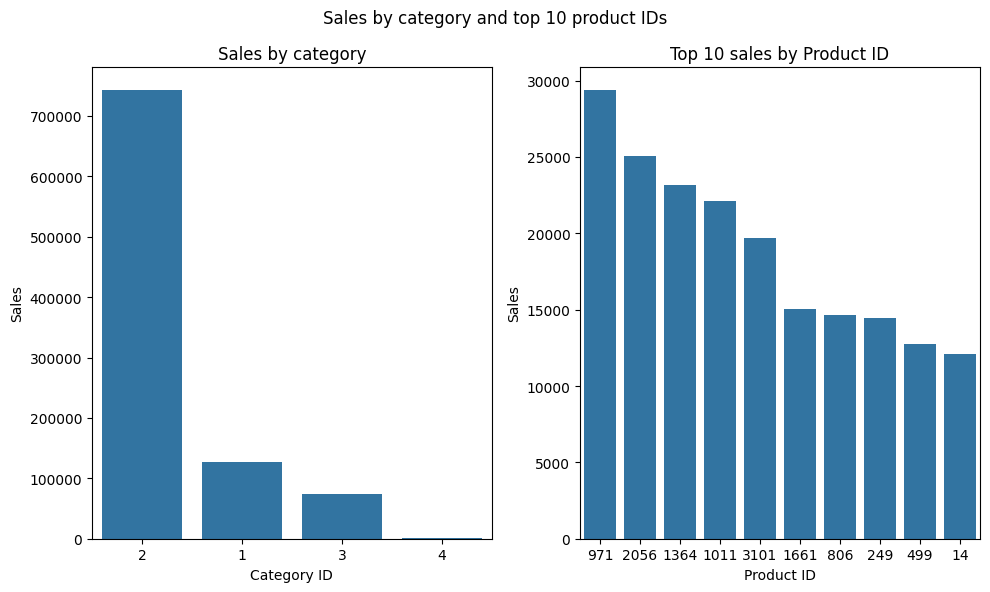

In [8]:
#sales by category and top 10 ids sales

#sales by category
plt.figure(figsize=(10,6)).suptitle('Sales by category and top 10 product IDs')
plt.subplot(1,2,1)
category_sum = dataset.groupby('category_id')['sales'].sum()
top_cat = category_sum.nlargest()
sb.barplot(x=top_cat.index,y=top_cat.values,order=top_cat.index).set_title('Sales by category')
plt.xlabel('Category ID')
plt.ylabel('Sales')

#sales by top 10 product id
plt.subplot(1,2,2)
id_sales = dataset.groupby('id')['sales'].sum()
top10_id = id_sales.nlargest(10)
sb.barplot(x=top10_id.index, y=top10_id.values, order=top10_id.index).set_title('Top 10 sales by Product ID')
plt.xlabel('Product ID')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Month')

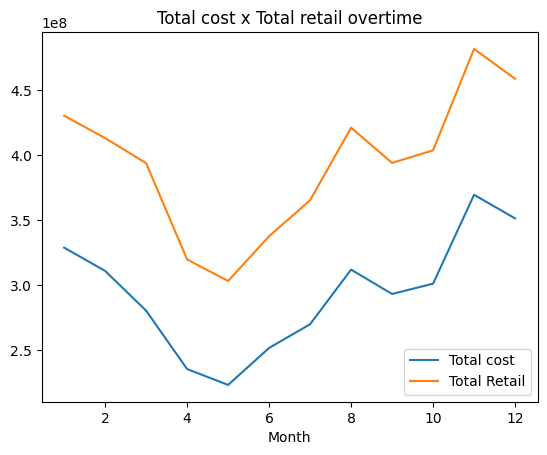

In [9]:
#graph: price cost x price retail per month

dataset['month']=dataset['date'].dt.month
dataset.head()

dataset['total_cost'] = dataset['price_cost']*dataset['sales']
total_cost_plot = dataset.groupby(dataset['month'])['total_cost'].sum()

dataset['total_retail'] = dataset['price_retail']*dataset['sales']
total_retail_plot = dataset.groupby(dataset['month'])['total_retail'].sum()

plt.figure()
plt.plot(total_cost_plot, label="Total cost")
plt.plot(total_retail_plot, label = "Total Retail")
plt.title('Total cost x Total retail overtime')
plt.legend(loc='lower right')
plt.xlabel('Month')


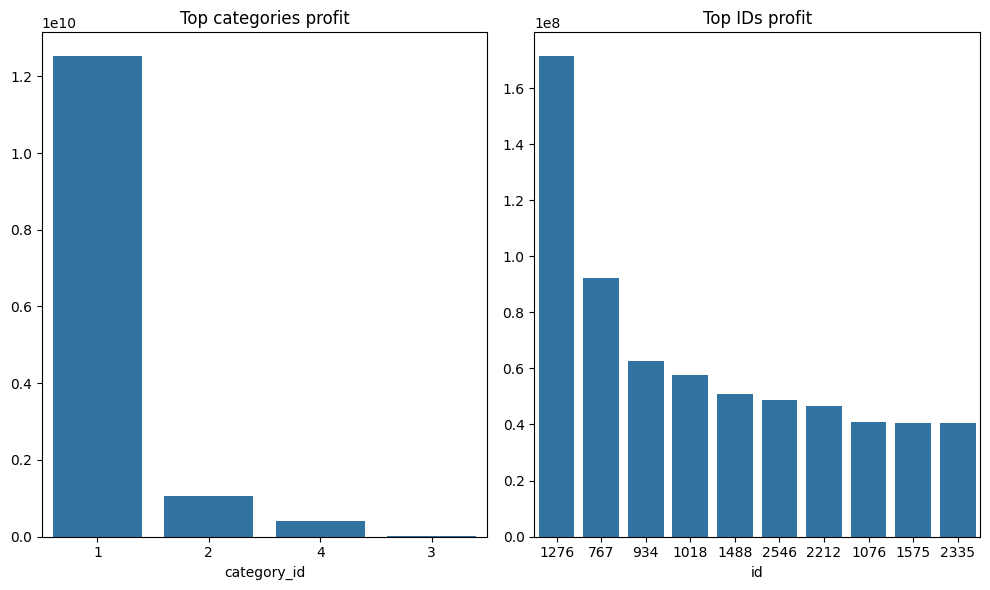

In [10]:
#considering profit = retail - cost, what are the top ids and categories to invest on

dataset['profit'] = dataset['price_retail']-dataset['price_cost']
profits_category = dataset.groupby(dataset['category_id'])['profit'].sum()
top_cat_profits = profits_category.nlargest()
profits_id = dataset.groupby(dataset['id'])['profit'].sum()
top_id_profits = profits_id.nlargest(10)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sb.barplot(x=top_cat_profits.index,y=top_cat_profits.values,order=top_cat_profits.index).set_title('Top categories profit')
plt.subplot(1,2,2)
sb.barplot(x=top_id_profits.index,y=top_id_profits.values,order=top_id_profits.index).set_title('Top IDs profit')

plt.tight_layout()
plt.show()
